# Practical 3: The perceptron and intro to deep learning. 

This practical takes you through the basic ingredients of artificial neural networks. We start with simple perceptrons, gradually adapting and training them. After that, we graduate to multi-layer perceptrons. Again, you need to finish and return the notebook individually. 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
import os

np.random.seed(123)


################################################################################################
# Set the path to the data files that you downloaded correctly here. 
################################################################################################

os.chdir('LOCATIONWHEREYOURDATAIS')


## Question 1, the "Manual Perceptron"

The first piece of code has you play with perceptrons that have weights and a threshold set manually. For simplicitly, we will stick to examples with only 2 inputs.
Have a look at the code in the cell below. The code defines perceptrons as ‘objects’ that have properties (weights, a threshold) and can do things with their member functions. In this case, the member function `process_input()` will take a set of inputs `x` and tell us what the output is, using its weight and its threshold.
The values for the weights and the threshold are set at random when the perceptron is created, but can be changed through the functions `set_weights()` and `set_threshold()` This perceptron has a step-wise activation function: its output is 1 or 0.

In [18]:
class ManualPerceptron(object):
    """A perceptron -- hand-crafted"""
    def __init__(self, nIn=2, nOut=1):
        super(ManualPerceptron, self).__init__()
        self.nIn = nIn
        self.nOut = nOut

        # w is initialized with random values:
        self.w = np.random.sample( (1, nIn + 1) ) - 0.5

        print("Perceptron constructed with random values:")
        print("weights: {}".format(  np.round(self.w[:,:-1], 2)))
        print("theta  : {}".format(  np.round(self.w[:, -1], 2 ) ))
        return
        
    def set_weights(self, w ):
        assert np.array(w).size == self.w.size -1
        self.w[:, :-1] = np.array(w)
        return

    def set_threshold(self, theta):
        self.w[:, -1] = theta

    def process_input(self, x):
        x = np.array(x)
        x = np.r_[x, -1] # this line adds the bias input

        # compute the activation: w dot x (vector product)
        activation = self.w.dot(x)

        if activation > 0.0:
            return 1.0
        return 0.0

First, have a look at the cell below. In this cell, a perceptron is created, and two inputs are defined: red and green apples. They both have an input value for ‘red: 1/0’ and ‘green: 1/0’.

In [24]:
p = ManualPerceptron(nIn = 2, nOut=1)

apple_inputs = dict(
    red_apple = [ 1, 0], # red, not green
    green_apple=[ 1, 1], # red, green
)

for k, x in apple_inputs.items():
    print("presenting {} to the perceptron:".format( k ))
    print(p.process_input(x))

Perceptron constructed with random values:
weights: [[-0.39 -0.45]]
theta  : [-0.17]
presenting red_apple to the perceptron:
0.0
presenting green_apple to the perceptron:
0.0


Now, set 2 weights and a threshold theta. Choose values so that the network fires in response to green apples and not to red apples. Leave these values you chose in the notebook, as well as the printed output when you run the function.

In [ ]:
p.set_weights(w = [ NUMBERHERE , NUMBERHERE ])
p.set_threshold( theta= NUMBERHERE )

for k, x in apple_inputs.items():
    print("presenting {} to the perceptron:".format( k ))
    print(p.process_input(x))

if I tell you to set theta at 1.5, and the weight for ‘green’, w2, to 1.0 – what values can you still choose for w1 so that the green-apple-detector-perceptron still does its job? Answer in a separate markdown cell below. 

### Classify fruit

Now, let’s move on to the next section, in which we classify fruit. I have already set values for the weights and the threshold in such a way that the perceptron only fires for apples, not for any other fruit.

- What are the activation values of the perceptron for each of these weights?

- At the end of the cell, there is incomplete code to plot a separation line for this problem. The line is defined by choosing 5 values for `x2`, that correspond to the pre-set values for `x1`. If you give correct values, you should get a plot with a separation line that corresponds to the defined perceptron. So, your task is to input the `x2` values to generate the correct separation line.

- Can you give values for a correct perceptron if we want to respond to every fruit except a banana? If not, why not?

- Can you give values for a correct perceptron if we want to respond only to the banana? If not, why not?

- Can you define a perceptron that responds only to ’sweet’ fruit (i.e. apple and banana)? If not, why not?

Place your answers in a separate markdown cell below the code you've used to generate your answer (if any)

Perceptron constructed with random values:
weights: [[-0.34 -0.08]]
theta  : [-0.25]
presenting apple to the perceptron
..output was FIRE
presenting grapefruit to the perceptron
..output was NOT FIRE
presenting chili to the perceptron
..output was NOT FIRE
presenting banana to the perceptron
..output was NOT FIRE


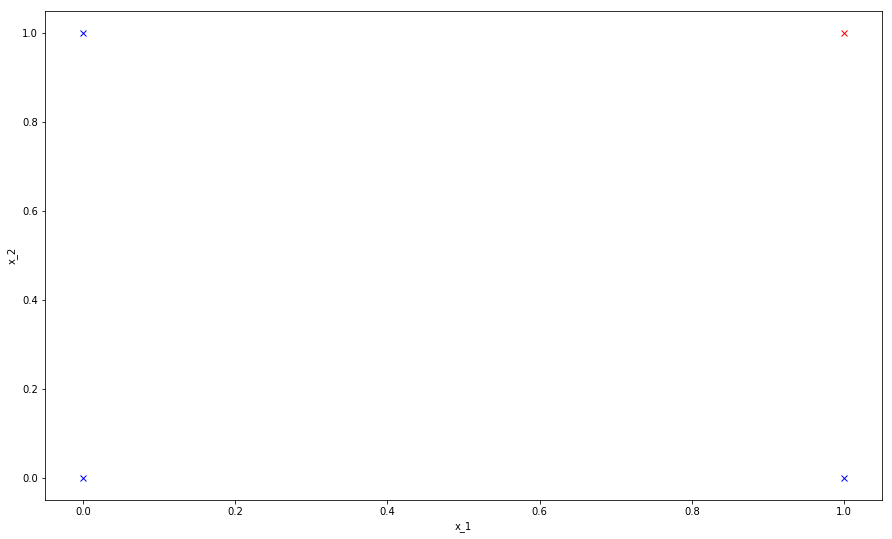

In [26]:
p = ManualPerceptron(nIn = 2, nOut=1)

fruit_inputs = dict(
    apple       = [ 1, 1], # round, red
    grapefruit  = [ 1, 0], # round, not red
    chili       = [ 0, 1], # curved, red
    banana      = [ 0, 0], # curved, not red
)

# define a perceptron:
p.set_weights(w = [ 1 , 1 ])
p.set_threshold( theta= 1.5 )
plt.figure(figsize=(15,9))

for k, x in fruit_inputs.items():
    print("presenting {} to the perceptron".format( k )),
    output = p.process_input(x)
    if output == 1.0:
        plt.plot( x[0], x[1], 'rx' ) # plot red o for 'FIRE'
        print("..output was FIRE")
    else:
        plt.plot( x[0], x[1] ,'bx' ) # plot blue x for 'not fire'
        print("..output was NOT FIRE")

plt.xlabel('x_1')
plt.ylabel('x_2')

# draw the separation line:
# x1w1 + x2w2 - theta = 0
x1  = [0.0, 0.2, 0.5, 0.9, 1.0]
x2  = []
# plt.plot(x1, x2, 'k:')
plt.show()

### Noise Fruit

So far, inputs to the perceptron have been very clear: 1 or 0. However, we can not always assume that inputs are this clear-cut: some apples are more ‘round’ than others, and some bananas might be more yellow-ish than others.

The next cell models this noisy scenario for a perceptron that should dissociate apples from bananas. For each fruit, it classifies 50 examples, that have noise added to them so that they more or less look like their prototypes.

- Change the first lines of code to gradually run the simulation with more and more noise in the data. At some point, the graph will show that pieces of fruit that are either apples or bananas (indicated by the circles) are erroneously classified (the crosses reflect the perceptrons output). Put one graph where this is the case in your report

- Highlight one of the datapoints that is incorrectly classified with the given perceptron. What were the input values? Is the datapoint more like an apple/banana?

- BONUS: a multi-layer perceptron can be trained to correctly classify your noisy fruit samples. Do you think this would be a good idea? Why (not)?


Perceptron constructed with random values:
weights: [[ 0.4   0.38]]
theta  : [-0.43]


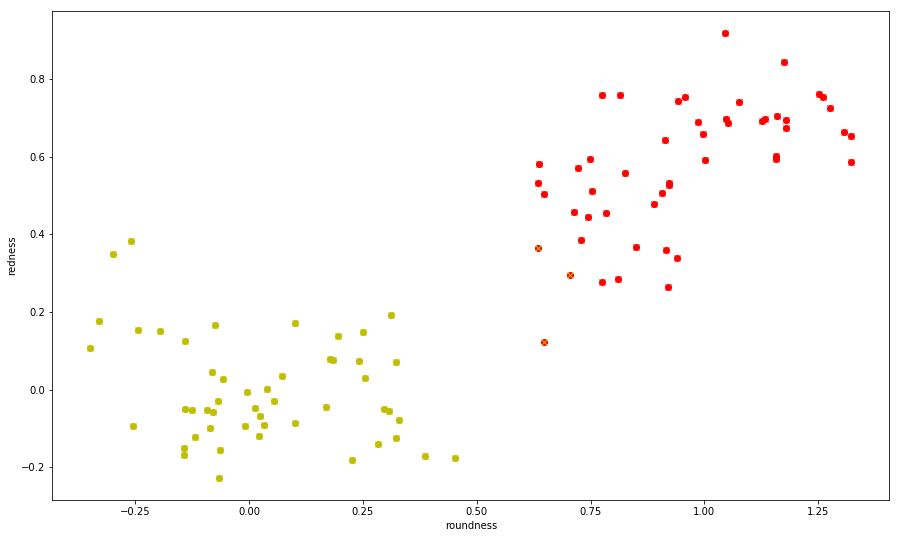

In [28]:
p = ManualPerceptron(nIn = 2, nOut=1)
sd = 0.1 # sd of the noise:
# sd = 0.2 # sd of the noise:
# sd = 0.5 # sd of the noise:

fruit_inputs = dict(
    apple       = [ 1, 1], # round, red
    banana      = [ 0, 0], # curved, not red
)

# define a perceptron:
p.set_weights(w = [ 1 , 1 ])
p.set_threshold( theta= 1 )
plt.figure(figsize=(15,9))

for k, x in fruit_inputs.items():
    # present 50 noisy pieces of fruit:
    for i in range(50) :
        # every fruit is its prototype + noise:
        x = np.array(x) + np.random.normal(0.0, sd, size=2)
        # plot the data-point:
        if k =='apple':
            plt.plot( x[0], x[1], 'ro' )
        else: 
            plt.plot( x[0], x[1], 'yo' )
        # what does the perceptron say?:
        output = p.process_input(x)
        if output == 1.0:
            plt.plot( x[0], x[1], 'rx' ) # plot red o for 'FIRE'
        else:
            plt.plot( x[0], x[1] ,'yx' ) # plot yellow x for 'not fire'

plt.xlabel('roundness')
plt.ylabel('redness')
plt.show()

## Question 2, the Perceptron that learns to read

In class, I showed you how, conceptually, we could train perceptrons to detect letters in pixelated input patterns. In the present assignment, we will train a perceptron to read a different representation of letters and symbols, namely braille. Braille is an alphabet, developed for the blind, where each symbol consists of 6 ‘dots’ that can be raised in the paper or not. The result is a pattern of bumps that can be interpreted by touch.
Braille is easily turned into a representation that a perceptron can process, because each of the 6 ‘bumps’ can be ‘on or off’. Therefore, each character can be presented as a 6-points input vector of 1s and 0s.
The dataset `braille_binary.csv` contains all characters expressed in standard braille: letters, digits, and some other symbols. 

The following code creates the Perceptron class used for this Question

In [34]:
class Perceptron(object):
    """a trainable Perceptron"""
    def __init__(self, nIn = 6, epsilon = 0.25):
        super(Perceptron, self).__init__()
        self.nIn = nIn

        # set weights (and threshold) to random array
        self.w = np.random.sample( (1, nIn + 1) ) - 0.5

        # Set learning-rate
        self.epsilon = epsilon
        
        # activity a
        self.a = 0.0

        # Sigmoid  function, and its derivative
        self.sigmoid = lambda a : 1 / ( 1 + ( np.e**( -a ) ) )
        self.d_sigmoid = (lambda a : # ...
            ( np.e**(- a)) / (np.e ** (- a) + 1)**2 )
        return

    """
    Perceptron output given an input pattern x
    """
    def output(self, x):
        # add virtual input for threshold
        self.x = np.r_[ x, 1.0 ]
        self.a = np.dot(self.w, self.x)
        self.y = self.sigmoid( self.a )
        return self.y

    """
    Weight updating process; the delta-rule
    """
    def update_weights(self, target):
        delta = (self.y - target) * self.d_sigmoid(self.a)

        self.w += - self.epsilon * delta * self.x
        return

def plot_braille(values):
    v = np.array(values).reshape((3, 2))
    plt.imshow(v, interpolation = 'nearest')
    ax = plt.gca()
    ax.set_xticks(np.arange(-.5, 2, 1), minor=True);
    ax.set_yticks(np.arange(-.5, 3, 1), minor=True);
    plt.grid(which='minor', color='k', linestyle='-', linewidth=5)
    plt.show()
    return



def train(p, dataset, plot_learning=False):
    dset = dataset[:]
    epoch = 0

    error_list = []

    while True:

        np.random.shuffle(dset)
        E = 0
        # now, loop over all exampes:
        for x, t in dset:
            # compute the output
            y = p.output(x)
            # tell it what the target was:
            p.update_weights(t)
            E += 0.5 * (y - t)**2

        epoch += 1
        # keep track of the 'average error'
        E = E / len(dset)
        error_list.append(  E  )

        # check whether we should stop learning:
        if E < 0.005 or epoch > 10000:
            break

    if plot_learning:
        plt.plot(error_list)
        plt.show()
    return

The next cell can be used to train a perceptron to respond to one of the symbols in this alphabet

- modify the function call so that the function is trained on the first letter of your first name. If you run the function, it should plot a 3 × 2 representation of your letter, with squares being either ‘on’ or ‘off’ to reflect the bumps in braille. Put this plot, and your letter, in your report.

- If you uncomment the `train` function call, the perceptron is actually trained to detect your letter. When it is done, it should produce a graph. Describe what is being plotted here, and what this has to do with the concept of ‘gradient descent’.

- If you uncomment the next few lines, the program should now additially plot a representation of the weights it found after training (and it prints them). Is there anything noteworthy to report about these weights?

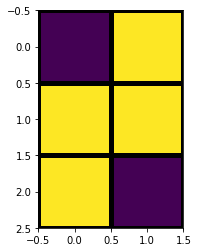

In [33]:
target_letter = 'T'

# load the alphabet:
braille_alphabet = pd.read_csv('braille_binary.csv')

# extract all datacolumns:
symbols = braille_alphabet[['ASCII Glyph']].values.flatten()
braille = braille_alphabet[['bitstring']].values.flatten()
braille = [ ast.literal_eval(x) for x in braille]

targets = [target_letter]
target_values = [(1 if s in targets else 0) for s in symbols  ]

# after the next line: 'dataset' will be a list of 
# x,t tuples, which can be used by the function 'train()'
dataset = list(zip(braille, target_values))

# have a look at the braille representation:
for x,t in dataset:
    if t == 1:
        plot_braille(x)

# now, let's make/train a perceptron:
p = Perceptron(nIn=6)

# train(p, dataset,plot_learning=True)

# print(p.w[:,:-1])
# plot_braille(p.w[:,:-1])

- The code, as it is now, does not run any training process, but instead plots all the braille representations of each of the digits. Have a look at all 10 of them. Do you suspect the perceptron will be able to learn this task? Why (not) ?

- Uncomment the three lines to train the perceptron and plot the resulting weights. Put the plot of the weights in your report.

- The cell also prints the output values of the perceptron in response to every symbol in the alphabet. Which of the symbols that is NOT a digit is most like a digit? How can you tell?

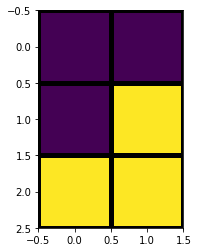

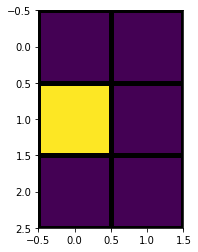

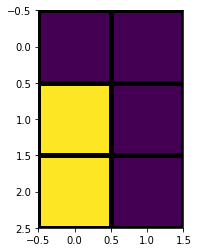

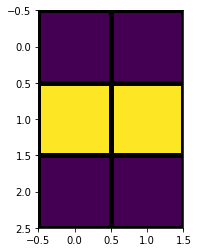

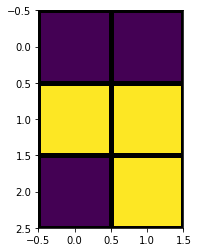

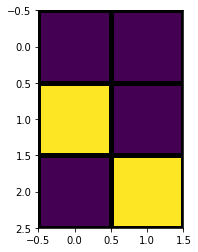

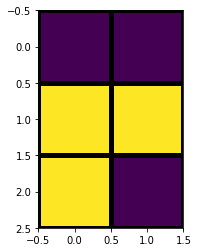

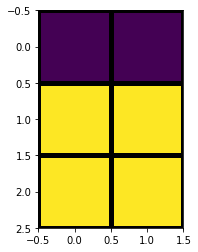

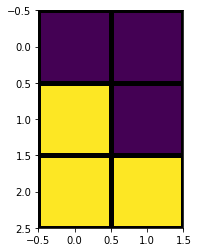

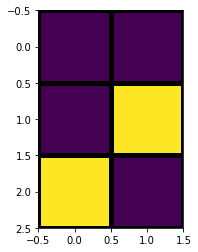

In [36]:
# load the alphabet:
braille_alphabet = pd.read_csv('braille_binary.csv')

# extract all datacolumns:
symbols = braille_alphabet[['ASCII Glyph']].values.flatten()
braille = braille_alphabet[['bitstring']].values.flatten()
braille = [ast.literal_eval(x) for x in braille]

targets = list('0123456789')
target_values = [(1 if s in targets else 0) for s in symbols  ]

# after the next line: 'dataset' will be a list of 
# x,t tuples, which can be used by the function 'train()'
dataset = list(zip(braille, target_values))

# have a look at the braille representation:
for x,t in dataset:
    if t == 1:
        plot_braille(x)

# now, let's make/train a perceptron:
p = Perceptron(nIn=6)

# train(p, dataset)
# print(p.w[:,:-1])
# plot_braille(p.w[:,:-1])

# for s, (x, t) in zip(symbols, dataset):
#     y = p.output(x)
#     print("output for {}: {} => {}".format(s, np.round(y,3), int(y > 0.5)))

We now move on to the last cell of this question.

- Observe that this is a task that the perceptron can not solve, and describe, in your own words, why this is the case.

- BONUS: Have a look at the output values of a perceptron that is trained, but can not solve the task. Which symbols form the biggest problem? Why does the perceptron struggle with these symbols?

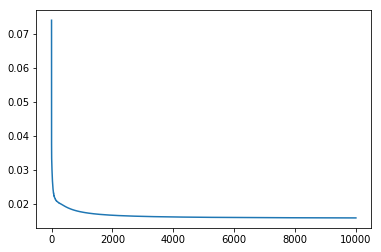

[[ 10.80832121 -11.10624058 -11.10619589   5.03682216  -5.12175664
  -11.10488616]]


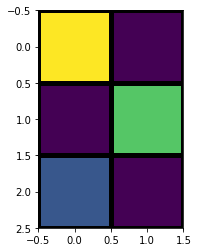

output for (space): [ 0.] => 0
output for !: [ 0.] => 0
output for ": [ 0.041] => 0
output for #: [ 0.] => 0
output for $: [ 0.] => 0
output for %: [ 0.] => 0
output for &: [ 0.] => 0
output for nan: [ 0.] => 0
output for (: [ 0.] => 0
output for ): [ 0.] => 0
output for *: [ 0.] => 0
output for =+: [ 0.] => 0
output for ,: [ 0.] => 0
output for -: [ 0.] => 0
output for .: [ 0.] => 0
output for /: [ 0.] => 0
output for 0: [ 0.] => 0
output for 1: [ 0.] => 0
output for 2: [ 0.] => 0
output for 3: [ 0.] => 0
output for 4: [ 0.] => 0
output for 5: [ 0.] => 0
output for 6: [ 0.] => 0
output for 7: [ 0.] => 0
output for 8: [ 0.] => 0
output for 9: [ 0.] => 0
output for :: [ 0.031] => 0
output for ;: [ 0.] => 0
output for <: [ 0.] => 0
output for =: [ 0.] => 0
output for >: [ 0.] => 0
output for ?: [ 0.] => 0
output for @: [ 0.] => 0
output for A: [ 0.933] => 1
output for B: [ 0.] => 0
output for C: [ 0.] => 0
output for D: [ 0.031] => 0
output for E: [ 1.] => 1
output for F: [ 0.] => 0
outp

In [37]:
# load the alphabet:
braille_alphabet = pd.read_csv('braille_binary.csv')

# extract all datacolumns:
symbols = braille_alphabet[['ASCII Glyph']].values.flatten()
braille = braille_alphabet[['bitstring']].values.flatten()
braille = [ ast.literal_eval(x) for x in braille]

targets = list('AEIOU')
target_values = [(1 if s in targets else 0) for s in symbols  ]

# after the next line: 'dataset' will be a list of 
# x,t tuples, which can be used by the function 'train()'
dataset = list(zip(braille, target_values))

# now, let's make/train a perceptron:
p = Perceptron(nIn=6)

train(p, dataset, plot_learning=True)
# plot the weights, if you like:
print(p.w[:,:-1])
plot_braille(p.w[:,:-1])

# what is the output for the entire dataset?
for s, (x, t) in zip(symbols, dataset):
    y = p.output(x)
    print("output for {}: {} => {}".format(s, np.round(y, 3), int(y > 0.5)))

## Question 3 – Training a Multi-layer perceptron


The code in the next cells is used to train the multilayer perceptron on the XOR task, and on the task to classify vowels in the braille alphabet. Have a look at the class for the MLP. I don’t expect you to fully understand what is going on here, but note the similarities with the code for the perceptron. Two basic differences are that the function that computes the output, is now changed into a function `ffwd()` that computes the feedforward pass of information through the network. The function to update the weights has been changed into a function `backpropagation()`, which is the name of the algorithm to train MLPs.


Conceptually, what happens in backpropagation is similar to the *delta rule*: every output node gets assigned a δ, proportional to their contribution to the final error. These values are used to train the weights projecting to the output nodes. Next, the network passes this delta on to the hidden layer, through the weights that project to y from h (although now, they project in the opposite direction, to h from y). This is used to assign a δ to the hidden layer nodes, proportional to their contribution to the output error. This δ is subsequently used to update the weights to the hidden layer from the input layer.


If you do not alter the code, it will initialize a network with 2 hidden layer nodes and 1 output node, in order to solve the XOR problem discussed in class.

In [40]:
# learning rate epsilon set globally:
epsilon = .3

# activation function:
sigmoid = lambda x: 1/(1+np.exp(-x))
dsigmoid=lambda x: np.exp(x)/( (np.exp(x) + 1)**2)

class MLP(object):
    """Neural Network with 1 hidden layer,
    Trained with backpropagation"""
    def __init__(self, nx, nh, ny=1):
        super(MLP, self).__init__()
        self.nx = nx
        self.nh = nh
        self.ny = ny
        
        # do random weight initialization
        self.init_weights()

        return

    def init_weights(self):
        """
        Init weight matrices
        """
        nx, ny, nh = self.nx, self.ny, self.nh
        #### weight matrices; unirand init::
        Whx = np.random.uniform(-1,1, (nh, nx+1) ) # +1 for the bias input
        Wyh = np.random.uniform(-1,1, (ny, nh+1) ) 
        
        self.Whx = Whx
        self.Wyh = Wyh 
        return


    def ffwd(self, x):
        """Sweep through the network of sigmoidal units; 
        store all activations and outputs and return y (output)
        """

        Whx, Wyh = self.Whx, self.Wyh

        # process x+bias input -> h
        x = np.r_[x, 1]
        ha = Whx.dot(x)
        h = sigmoid(ha)

        # process h+bias input -> y
        h = np.r_[h, 1]
        ya = np.dot(Wyh, h)
        y = sigmoid(ya)

        # this next line is short for: self.x=x; self.h=h, ....
        self.__dict__.update( dict(x=x, ha=ha,h=h,ya=ya,y=y ) )
        # return output:
        return y

    def backpropagation(self, t):
        # store the feedback weights:
        Why = self.Wyh.T[:-1, :] # ignoring the weight attached to the bias..

        # compute error 'vector':
        e = self.y - t
        # the weight update for the output weights is as normal:
        # inp * error * dsigmoid * learning rate
        # here, I'm using some tricks to skip a few of these steps:
        h = self.h[:, np.newaxis]
        e = e[np.newaxis, :]
        # the actual weight update
        self.Wyh -= e.dot(h.T) * dsigmoid(self.ya) * epsilon

        # now, propagate the error back, using Why:
        ha = self.ha[:, np.newaxis]
        delta_bp = Why.dot(e) * dsigmoid(ha)

        # use this new delta to update hidden weights:

        x = self.x[:, np.newaxis]
        self.Whx -= ( delta_bp.dot(x.T) ) * epsilon
        return


def train(net, dataset, plot_learning=False):
    dset = dataset[:]
    epoch = 0

    error_list = []

    while True:

        np.random.shuffle(dset)
        E = 0
        # now, loop over all exampes:
        for x, t in dset:
            # compute the output
            y = net.ffwd(x)
            # tell it what the target was:
            net.backpropagation(t)
            E += 0.5 * (y - t)**2

        epoch += 1
        # keep track of the 'average error'
        E = E / len(dset)
        error_list.append(  E  )

        # check whether we should stop learning:
        if E < 0.001 or epoch > 10000:
            break

    if plot_learning:
        plt.plot(error_list)
        plt.show()
    return

In [44]:
# and a function to run the actual XOR problem.
def learn_xor():
#     np.random.seed(22)
    # make a network:
    net = MLP(nx=2, nh=2, ny=1)

    dataset = [ 
        ([0, 0], 0),
        ([1, 0], 1),
        ([0, 1], 1),
        ([1, 1], 0),]

    train(net, dataset, plot_learning = True)

    for x,t in dataset:
        print(x, net.ffwd(x) )
    return

- Run the code for XOR a few times. As promised, the network is able to find a solution, most of the times. Unfortunately, not all the time. Can you give an example set of outputs in the case where the network does not learn the task?

- Can you describe what is happening when the task is not solved? (Tip: if you uncomment the first line inside the function (where the random number generator seed is set), the network will be initialized in a way that it will get stuck every time. You may use this to explore this situation in detail.)

- BONUS can you think of a way to circumvent this problem with a minimal change to the network? Apply your change to test your theory, and describe what you did.

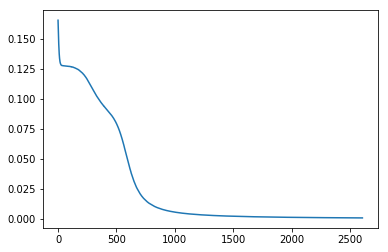

[0, 0] [ 0.04200796]
[1, 0] [ 0.95295793]
[0, 1] [ 0.95296002]
[1, 1] [ 0.04239179]


In [45]:
learn_xor()

If you run the next function, learn vowels(), the network does what the
perceptron couldn’t: classify vowels in the braille alphabet. Run the code a few times, and convince yourself that this can indeed be done.

- Now, imagine that we want to do multiple things at once: we want it to have three outputs: 1 to tell us whether the presented symbol was a digit, 1 to tell us whether the symbol was a vowel, and 1 to tell us whether it was a punctuation mark. There are two basic ways we can do this. 
    1. we may train three separate networks on these three different tasks, or 
    2. we can use the same network, but give it three outputs in parallel. 
    
Please choose which of these you would prefer, and give at least 2 reasons why.

In [48]:
def learn_vowels():
    # load the alphabet:
    braille_alphabet = pd.read_csv('braille_binary.csv')

    # extract all datacolumns:
    symbols = braille_alphabet[['ASCII Glyph']].values.flatten()
    braille = braille_alphabet[['bitstring']].values.flatten()
    braille = [ ast.literal_eval(x) for x in braille]

    targets = list('AEIOU')
    target_values = [(1 if s in targets else 0) for s in symbols  ]

    # after the next line: 'dataset' will be a list of 
    # x,t tuples, which can be used by the function 'train()'
    dataset = list(zip(braille, target_values))

    # now, let's make/train a perceptron:
    net = MLP(nx=6, nh=10, ny=1)
    train(net, dataset, plot_learning=False)

    # what is the output for the entire dataset?
    for s, (x, t) in zip(symbols, dataset):
        y = net.ffwd(x)
        print("output for {}: {} => {}".format(s, np.round(y, 3), int(y > 0.5)))

    return

In [49]:
learn_vowels()

output for (space): [ 0.006] => 0
output for !: [ 0.004] => 0
output for ": [ 0.033] => 0
output for #: [ 0.004] => 0
output for $: [ 0.004] => 0
output for %: [ 0.004] => 0
output for &: [ 0.004] => 0
output for nan: [ 0.011] => 0
output for (: [ 0.004] => 0
output for ): [ 0.004] => 0
output for *: [ 0.041] => 0
output for =+: [ 0.005] => 0
output for ,: [ 0.005] => 0
output for -: [ 0.035] => 0
output for .: [ 0.004] => 0
output for /: [ 0.004] => 0
output for 0: [ 0.004] => 0
output for 1: [ 0.026] => 0
output for 2: [ 0.004] => 0
output for 3: [ 0.005] => 0
output for 4: [ 0.004] => 0
output for 5: [ 0.004] => 0
output for 6: [ 0.004] => 0
output for 7: [ 0.004] => 0
output for 8: [ 0.005] => 0
output for 9: [ 0.005] => 0
output for :: [ 0.02] => 0
output for ;: [ 0.004] => 0
output for <: [ 0.004] => 0
output for =: [ 0.004] => 0
output for >: [ 0.004] => 0
output for ?: [ 0.004] => 0
output for @: [ 0.026] => 0
output for A: [ 0.911] => 1
output for B: [ 0.005] => 0
output for C

## Question 4 – A phenomenon when training networks

When training neural networks on problems that contain noisy data (such as, for example, our noisy-fruit example above) it is often good practice to use two datasets: one to actually perform the training (the training-set, and one to evaluate how well your network has learned the rules in the data (a test- or validation-set).

I have generated noisy data comparable to noisy-fruit data – but rather than training a single perceptron I created a 2-input-, 6-hidden- , 1-output- node network, and trained it on the problem of dissociating (0,0) from (1,1). (There were 200 patterns in the training set, and 100 in the test-set). Noise was added to both train- and test-set, with an SD of 0.3, which is moderate, but certainly not detrimental (for the single perceptron – feel free to try it out!). The result (see figure 1), actually showed something interesting.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/12/Example-of-Train-and-Validation-Learning-Curves-Showing-An-Overfit-Model.png)

- What happened to the performance on the training-set over iterations?

- What happened to the performance on the test-set over iterations?

- What is this phenomenon called?

- Is this bad or good? If this is good, what should we do to cause this more often? If this is bad, what should we do to prevent this?
